<a href="https://colab.research.google.com/github/celinka12/Data-Mining/blob/main/Celinka_E_0706022210042_Week6_Adult_Income_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA

In [222]:
import pandas as pd #import data dari csv/excel dll
import numpy as np #import linear algebra, manipulasi array
import matplotlib.pyplot as plt #menampilkan visualisasi data
import seaborn as sns #menampilkan visualisasi statistik dri data
from sklearn.preprocessing import LabelEncoder #mengubah label kategorikal menjadi numerik
from sklearn.model_selection import train_test_split #membagi dataset menjadi data pelatihan dan pengujian
from sklearn.tree import DecisionTreeClassifier #membuat model pohon keputusan
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report #evaluasi model
from sklearn import tree #visualisasi pohon keputusan
from sklearn.naive_bayes import GaussianNB #membuat model Naive Bayes

In [223]:
#1
dataset = pd.read_csv('https://raw.githubusercontent.com/celinka12/dataset_DM/refs/heads/main/adult.csv')
dataset.sample(10)#menampikan 10 random data dari dataset

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
17706,46,Private,134727,11th,7,Divorced,Machine-op-inspct,Unmarried,Amer-Indian-Eskimo,Male,0,0,43,Germany,<=50K
48193,62,?,31577,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,0,0,18,United-States,<=50K
18563,31,Private,219509,HS-grad,9,Married-civ-spouse,Other-service,Husband,White,Male,0,0,40,Mexico,>50K
35821,32,Private,159187,Assoc-voc,11,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,40,United-States,<=50K
13889,23,Private,37894,HS-grad,9,Separated,Other-service,Own-child,White,Female,0,0,40,United-States,<=50K
7686,37,Private,130200,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,70,United-States,>50K
44596,39,Private,365739,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,>50K
35504,73,Private,198526,HS-grad,9,Widowed,Other-service,Other-relative,White,Female,0,0,32,United-States,<=50K
5562,45,Private,160428,Assoc-acdm,12,Divorced,Prof-specialty,Unmarried,White,Female,0,0,43,United-States,<=50K
41918,29,Self-emp-inc,168221,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,1740,70,United-States,<=50K


In [224]:
#2
dataset.info()
# menampilkan ringkasan struktur dataset tentang jumlah baris, kolom, tipe data, nilai non-null, dan penggunaan memori dari DataFrame.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [225]:
#3
dataset.describe()
#menghasilkan statistik deskriptif dari kolom numerik dalam DataFrame. Untuk memahami distribusi dan variasi data

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [226]:
#4
colom = {'age', 'workclass','fnlwgt',	'education',	'educational-num',	'marital-status',	'occupation'	,'relationship',	'race',	'gender',	'capital-gain',	'capital-loss',	'hours-per-week',	'native-country',	'income'}
for col in colom:
  print(dataset[col].value_counts())
#menghitung frekuensi kemunculan nilai unik di kolom species, island, dan sex dalam dataset, termasuk nilai kosong jika ada (dropna=False)

fnlwgt
203488    21
190290    19
120277    19
125892    18
126569    18
          ..
188488     1
285290     1
293579     1
114874     1
257302     1
Name: count, Length: 28523, dtype: int64
relationship
Husband           19716
Not-in-family     12583
Own-child          7581
Unmarried          5125
Wife               2331
Other-relative     1506
Name: count, dtype: int64
race
White                 41762
Black                  4685
Asian-Pac-Islander     1519
Amer-Indian-Eskimo      470
Other                   406
Name: count, dtype: int64
age
36    1348
35    1337
33    1335
23    1329
31    1325
      ... 
88       6
85       5
87       3
89       2
86       1
Name: count, Length: 74, dtype: int64
hours-per-week
40    22803
50     4246
45     2717
60     2177
35     1937
      ...  
69        1
87        1
94        1
82        1
79        1
Name: count, Length: 96, dtype: int64
education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc

In [227]:
#4 # untuk mengganti semua nilai "?" dengan NaN
dataset.replace("?", np.nan, inplace = True)

In [228]:
#5
dataset.isnull().sum()
#dropna() digunakan untuk menghapus baris atau kolom yang mengandung nilai kosong (NaN).
#isnull() untuk memeriksa apakah ada nilai yang kosong (null atau NaN) di dalam dataset

,0
age,0
workclass,2799
fnlwgt,0
education,0
educational-num,0
marital-status,0
occupation,2809
relationship,0
race,0
gender,0


In [229]:
# untuk mengganti missing value dengan modus (nilai yang paling sering muncul) karena modus mewakili nilai umum pada kolom tersebut.
for col in ['workclass', 'occupation', 'native-country']:
    dataset[col] = dataset[col].fillna(dataset[col].mode()[0])

In [230]:
#5
dataset.isnull().sum()
#dropna() digunakan untuk menghapus baris atau kolom yang mengandung nilai kosong (NaN).
#isnull() untuk memeriksa apakah ada nilai yang kosong (null atau NaN) di dalam dataset

,0
age,0
workclass,0
fnlwgt,0
education,0
educational-num,0
marital-status,0
occupation,0
relationship,0
race,0
gender,0


In [231]:
#untuk menampilkan nilai unik dari target variabel di dalam dataframe
print(f"Nilai unik untuk Income:")
print(dataset["income"].unique())

Nilai unik untuk Income:
['<=50K' '>50K']


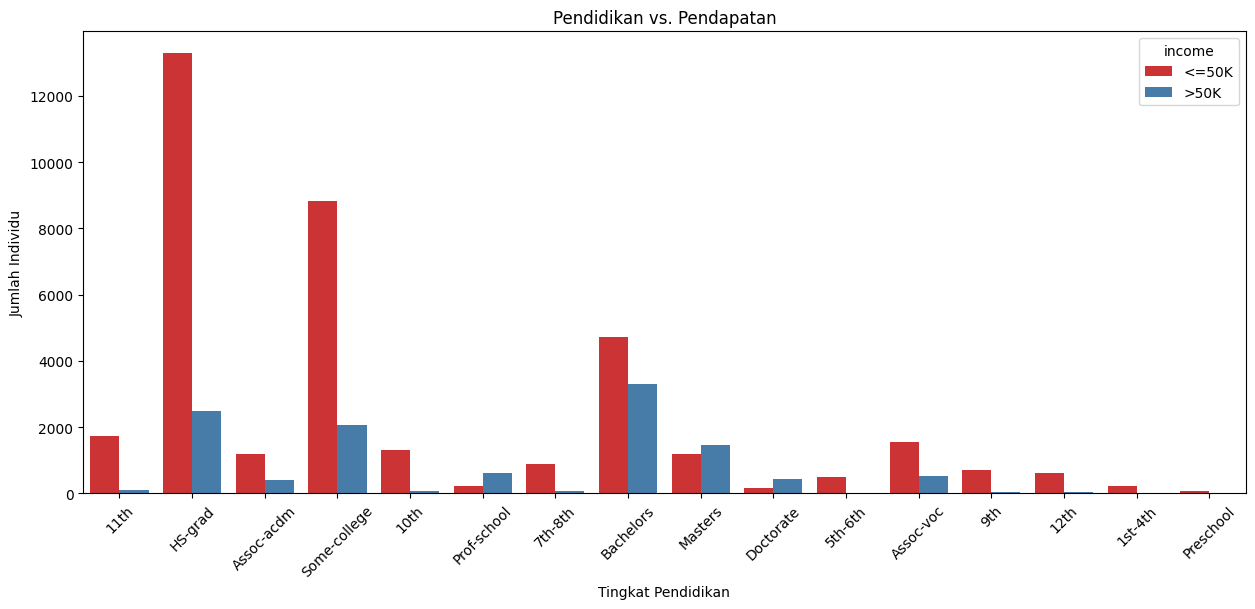

In [232]:
# 6 Pendidikan Berdasarkan Pendapatan
plt.figure(figsize=(15, 6))
sns.countplot(x="education", hue="income", data=dataset, palette="Set1")
plt.title("Pendidikan vs. Pendapatan")
plt.xlabel("Tingkat Pendidikan")
plt.ylabel("Jumlah Individu")
plt.xticks(rotation=45)
#Memutar label pada sumbu X sebesar 45 derajat untuk memastikan label pendidikan dapat terbaca dengan baik, terutama ketika teks labelnya panjang.
plt.show()
#untuk menunjukkan tren bahwa semakin tinggi tingkat pendidikan, semakin banyak individu yang berada dalam kategori pendapatan >50K.

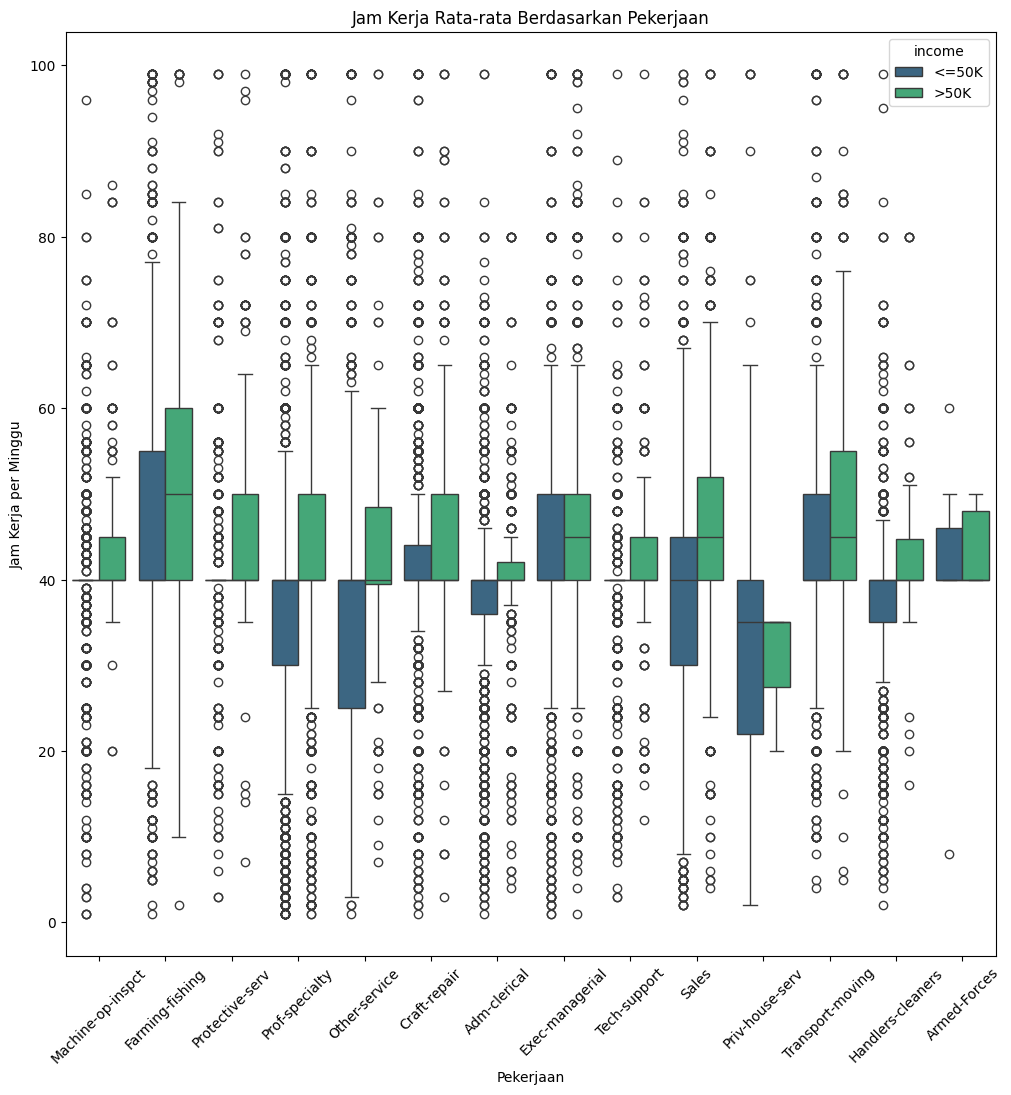

In [233]:
#7 Jam Kerja Rata-rata Berdasarkan Pekerjaan
plt.figure(figsize=(12, 12))
sns.boxplot(x="occupation", y="hours-per-week", hue="income", data=dataset, palette="viridis")
plt.title("Jam Kerja Rata-rata Berdasarkan Pekerjaan")
plt.xlabel("Pekerjaan")
plt.ylabel("Jam Kerja per Minggu")
plt.xticks(rotation=45)
#Memutar label pada sumbu X sebesar 45 derajat untuk memastikan teks dapat dibaca dengan baik, terutama untuk kategori pekerjaan yang banyak
plt.show()

#untuk melihat visualisasi distribusi jam kerja per minggu untuk berbagai jenis pekerjaan, yang dibedakan berdasarkan kategori pendapatan
#beberapa pekerjaan cenderung memiliki perbedaan distribusi jam kerja per minggu berdasarkan pendapatan, tetapi secara umum,
#variasi jam kerja antara kategori pendapatan tidak terlalu berbeda jauh di sebagian besar pekerjaan

In [234]:
# untuk mengubah kolom kategorikal (workclass, education, dll) menjadi numerik
label_encoder = LabelEncoder()

# untuk identifikasi dan memilih semua kolom kategorikal
categorical_columns = dataset.select_dtypes(include=['object']).columns

# untuk mengonversi setiap kolom kategorikal ke numerik
for col in categorical_columns:
    dataset[col] = label_encoder.fit_transform(dataset[col])

# untuk menampilkan 10 data random
dataset.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,3,226802,1,7,4,6,3,2,1,0,0,40,38,0
1,38,3,89814,11,9,2,4,0,4,1,0,0,50,38,0
2,28,1,336951,7,12,2,10,0,4,1,0,0,40,38,1
3,44,3,160323,15,10,2,6,0,2,1,7688,0,40,38,1
4,18,3,103497,15,10,4,9,3,4,0,0,0,30,38,0


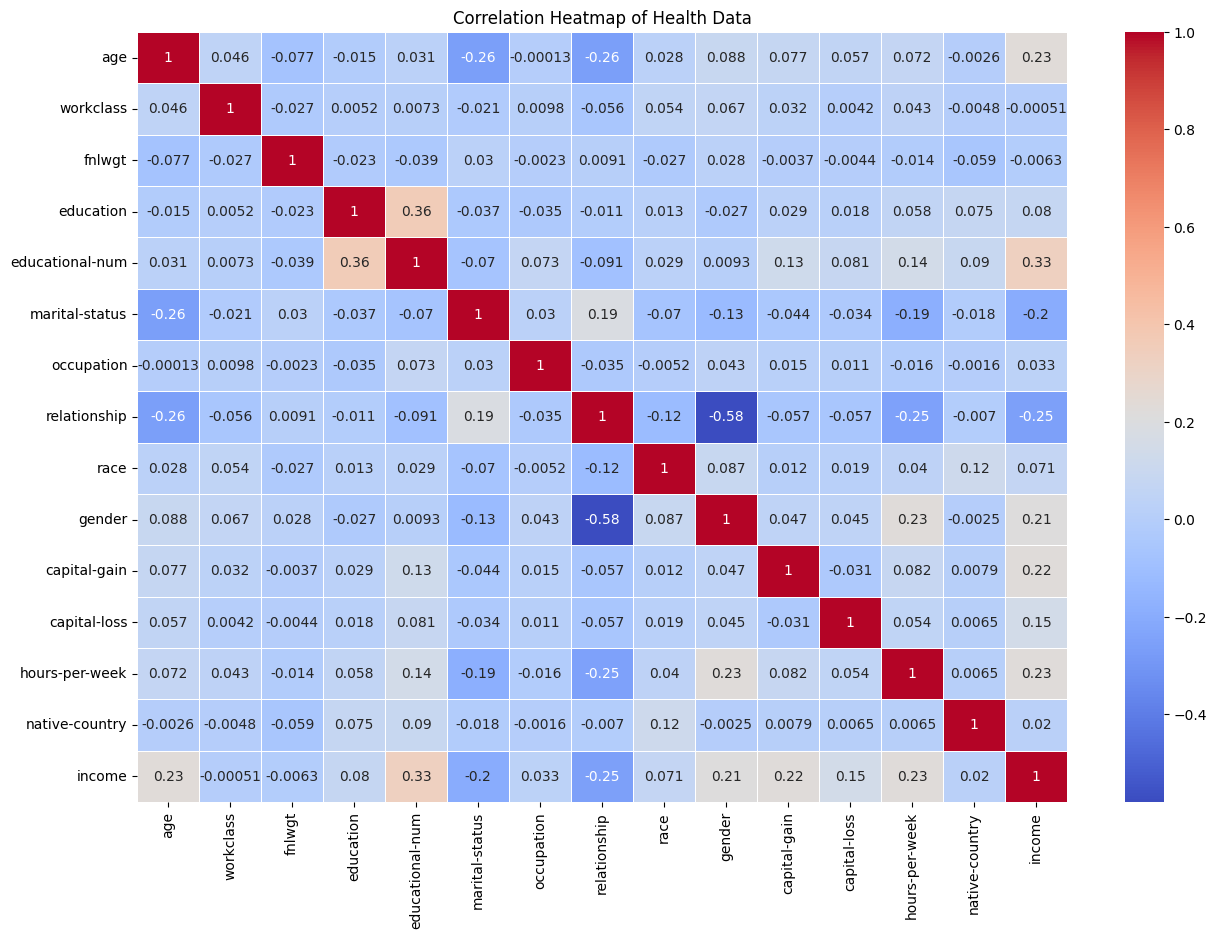

In [235]:
#heatmap
plt.figure(figsize=(15, 10))
corr_matrix = dataset.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
#berisi matriks korelasi, yaitu sebuah tabel di mana baris dan kolomnya adalah variabel dalam dataset, dan setiap nilai dalam tabel adalah koefisien korelasi antara dua variabel.

#seaborn untuk membuat heatmap yang memvisualisasikan matriks korelasi.
# visualisasi heatmap
plt.title('Correlation Heatmap of Health Data')
plt.show()
#membuat heatmap korelasi yang membantu memvisualisasikan hubungan antar variabel dalam dataset menggunakan pandas, matplotlib, dan seaborn.

# Machine **Learning**

In [236]:
#1
X = dataset.drop('income', axis=1)
y = dataset['income']

#memisahkan fitur (variabel independen) dan target (variabel dependen) dalam dataset untuk keperluan analisis atau model machine learning.

#X: DataFrame yang berisi semua kolom kecuali kolom species (dihapus dengan drop()).
#y: Series yang berisi kolom species, yang merupakan target yang ingin diprediksi.

In [237]:
#2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# membagi dataset menjadi dua bagian: data pelatihan (train) dan data pengujian (test) menggunakan fungsi train_test_split dari scikit-learn.
# X: Data fitur (input) yang akan digunakan untuk membuat model.
# y: Target atau label (output) yang akan diprediksi.
# test_size=0.20: Menentukan bahwa 20% dari dataset akan digunakan sebagai data pengujian, sementara 80% akan digunakan untuk pelatihan.
# random_state=42: Menjamin bahwa pembagian data selalu sama setiap kali kode dijalankan (agar hasil bisa direproduksi).

In [238]:
#3
print(X_train.shape)
print(X_test.shape)

#Mengetahui berapa banyak sampel dan fitur yang ada dalam data pelatihan dan pengujian setelah pembagian dataset, mencetak ukuran (dimensi) dari data fitur hasil pembagian (X_train dan X_test)
#X_train.shape: Mencetak ukuran atau dimensi dari data fitur yang digunakan untuk pelatihan. Biasanya, ini dalam bentuk (jumlah sampel, jumlah fitur).
#X_test.shape: Mencetak ukuran atau dimensi dari data fitur yang digunakan untuk pengujian.

(39073, 14)
(9769, 14)


# Decision Tree

## Entropy

In [239]:
#Criterion Entropy
#a
# instantiate the DecisionTreeClassifier model with criterion entropy index
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
# fit the model
clf_en.fit(X_train, y_train)

#criterion='entropy': Menggunakan entropy sebagai ukuran untuk menentukan kualitas pemisahan (split) pada node dalam pohon keputusan.
#max_depth=3: Membatasi kedalaman maksimum pohon keputusan hingga 3, untuk menghindari overfitting.
#random_state=0: Menetapkan seed untuk memastikan bahwa hasil pembagian akan selalu sama setiap kali kode dijalankan (agar bisa direproduksi).
#clf_en.fit = Melatih (fit) model dengan data pelatihan (X_train dan y_train), sehingga model dapat mempelajari hubungan antara fitur (X_train) dan target (y_train).

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [240]:
#b
y_pred_en = clf_en.predict(X_test)

#clf_en = untuk prediksi target (label) dari data fitur pengujian X_test.
# y_pred_en = perkiraan nilai target yang sesuai untuk setiap sampel dalam X_test.

In [241]:
#c
print('Model accuracy score with criterion entropy index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))
#accuracy_score = Menghitung skor akurasi, yaitu perbandingan antara label sebenarnya (y_test) dan prediksi yang dibuat oleh model (y_pred_en). Akurasi adalah rasio jumlah prediksi yang benar terhadap total prediksi.
#{0:0.4f}: Format untuk mencetak hasil akurasi dengan 4 angka desimal.

Model accuracy score with criterion entropy index: 0.8449


In [242]:
#d
print('Training set score: {:.4f}'.format(clf_en.score(X_train, y_train)))
#clf_en.score(X_train, y_train): Menghitung akurasi model pada data pelatihan (X_train, y_train). Ini menunjukkan seberapa baik model memprediksi data yang sudah dilatih
print('Test set score: {:.4f}'.format(clf_en.score(X_test, y_test)))
#clf_en.score(X_test, y_test): Menghitung akurasi model pada data pengujian (X_test, y_test). Ini menunjukkan seberapa baik model memprediksi data yang belum pernah dilihat sebelumny


Training set score: 0.8384
Test set score: 0.8449


[Text(0.5, 0.875, 'x[7] <= 0.5\nentropy = 0.796\nsamples = 39073\nvalue = [29676, 9397]'),
 Text(0.25, 0.625, 'x[4] <= 12.5\nentropy = 0.992\nsamples = 15869\nvalue = [8752, 7117]'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'x[10] <= 5095.5\nentropy = 0.918\nsamples = 11142\nvalue = [7435, 3707]'),
 Text(0.0625, 0.125, 'entropy = 0.882\nsamples = 10613\nvalue = [7426, 3187]'),
 Text(0.1875, 0.125, 'entropy = 0.124\nsamples = 529\nvalue = [9, 520]'),
 Text(0.375, 0.375, 'x[10] <= 5095.5\nentropy = 0.854\nsamples = 4727\nvalue = [1317, 3410]'),
 Text(0.3125, 0.125, 'entropy = 0.914\nsamples = 3999\nvalue = [1315, 2684]'),
 Text(0.4375, 0.125, 'entropy = 0.027\nsamples = 728\nvalue = [2, 726]'),
 Text(0.75, 0.625, 'x[10] <= 7055.5\nentropy = 0.463\nsamples = 23204\nvalue = [20924, 2280]'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'x[7] <= 4.5\nentropy = 0.398\nsamples = 22702\nvalue = [20910, 1792]'),
 Text(0.5625, 0.125, 'entropy = 0.287\nsamples = 20994\nvalue = [1994

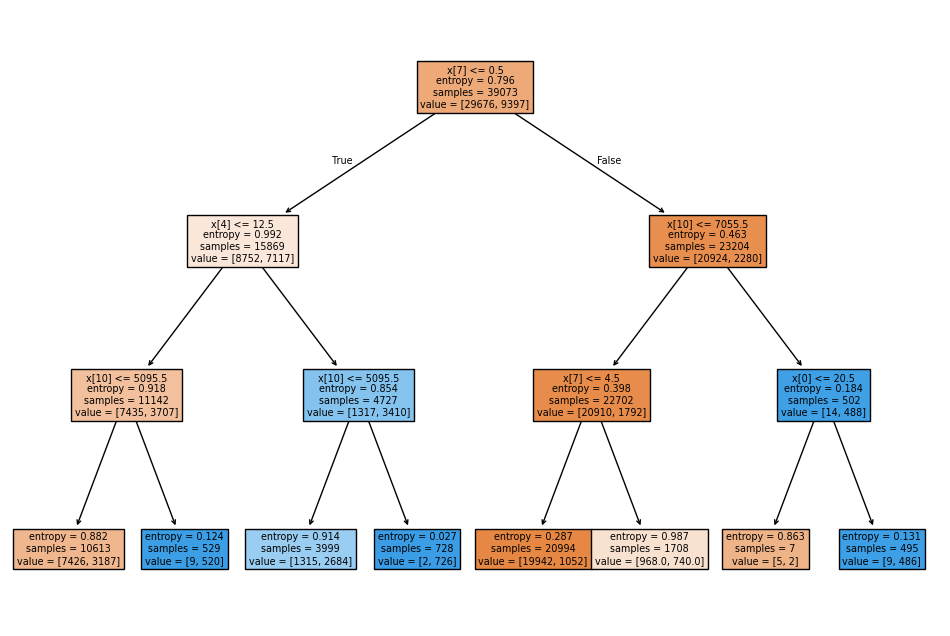

In [243]:
#e
plt.figure(figsize=(12,8))
# figure (kanvas gambar) dengan ukuran 12x8 inci untuk visualisasi, sehingga lebih besar dan lebih mudah dilihat.

from sklearn import tree
tree.plot_tree(clf_en.fit(X_train, y_train), filled = True)

#clf_en.fit(X_train, y_train): Melatih ulang model Decision Tree menggunakan data pelatihan.
#tree.plot_tree(...): Membuat visualisasi dari struktur pohon keputusan (decision tree) yang terbentuk.
#filled=True: Mengisi setiap node dengan warna yang menunjukkan dominasi kelas di node tersebut, memudahkan interpretasi visual.

# Gini

In [244]:
#a
# instantiate the DecisionTreeClassifier model with criterion gini index
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
# fit the model
clf_gini.fit(X_train, y_train)

#criterion='gini': Menggunakan Gini impurity sebagai ukuran untuk menentukan kualitas pemisahan (split) pada node dalam pohon keputusan.
#max_depth=3: Membatasi kedalaman maksimum pohon keputusan hingga 3, yang dapat mencegah model overfitting.
#random_state=0: Menetapkan seed untuk memastikan hasil yang konsisten setiap kali kode dijalankan.
#clf_gini.fit: Melatih model dengan data pelatihan (X_train, y_train).

DecisionTreeClassifier(max_depth=3, random_state=0)

In [245]:
#b
y_pred_gini = clf_gini.predict(X_test)
#clf_gini.predict(X_test): Menggunakan model clf_gini (yang sudah dilatih) untuk memprediksi label (target) dari data fitur pengujian X_test.
#y_pred_gini: Hasil prediksi dari model, yaitu nilai target yang diperkirakan untuk setiap sampel dalam X_test.

In [246]:
#c
print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))
#kor akurasi, yaitu perbandingan antara label sebenarnya (y_test) dan prediksi yang dibuat oleh model (y_pred_gini).
#Akurasi dihitung sebagai rasio jumlah prediksi yang benar terhadap total jumlah prediksi.

Model accuracy score with criterion gini index: 0.8449


In [247]:
#d
print('Training set score: {0:0.4f}' .format(clf_gini.score(X_train, y_train)))
#clf_gini.score(X_train, y_train): Menghitung akurasi model pada data pelatihan (X_train, y_train). Ini menunjukkan seberapa baik model memprediksi data yang telah dilatih.
print('Test set score: {0:0.4f}' .format(clf_gini.score(X_test, y_test)))
#clf_gini.score(X_test, y_test): Menghitung akurasi model pada data pengujian (X_test, y_test). Ini menunjukkan seberapa baik model memprediksi data yang belum pernah dilihat sebelumnya.

Training set score: 0.8384
Test set score: 0.8449


[Text(0.5, 0.875, 'x[7] <= 0.5\ngini = 0.365\nsamples = 39073\nvalue = [29676, 9397]'),
 Text(0.25, 0.625, 'x[4] <= 12.5\ngini = 0.495\nsamples = 15869\nvalue = [8752, 7117]'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'x[10] <= 5095.5\ngini = 0.444\nsamples = 11142\nvalue = [7435, 3707]'),
 Text(0.0625, 0.125, 'gini = 0.42\nsamples = 10613\nvalue = [7426, 3187]'),
 Text(0.1875, 0.125, 'gini = 0.033\nsamples = 529\nvalue = [9, 520]'),
 Text(0.375, 0.375, 'x[10] <= 5095.5\ngini = 0.402\nsamples = 4727\nvalue = [1317, 3410]'),
 Text(0.3125, 0.125, 'gini = 0.441\nsamples = 3999\nvalue = [1315, 2684]'),
 Text(0.4375, 0.125, 'gini = 0.005\nsamples = 728\nvalue = [2, 726]'),
 Text(0.75, 0.625, 'x[10] <= 7055.5\ngini = 0.177\nsamples = 23204\nvalue = [20924, 2280]'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'x[7] <= 4.5\ngini = 0.145\nsamples = 22702\nvalue = [20910, 1792]'),
 Text(0.5625, 0.125, 'gini = 0.095\nsamples = 20994\nvalue = [19942, 1052]'),
 Text(0.6875, 0.125, '

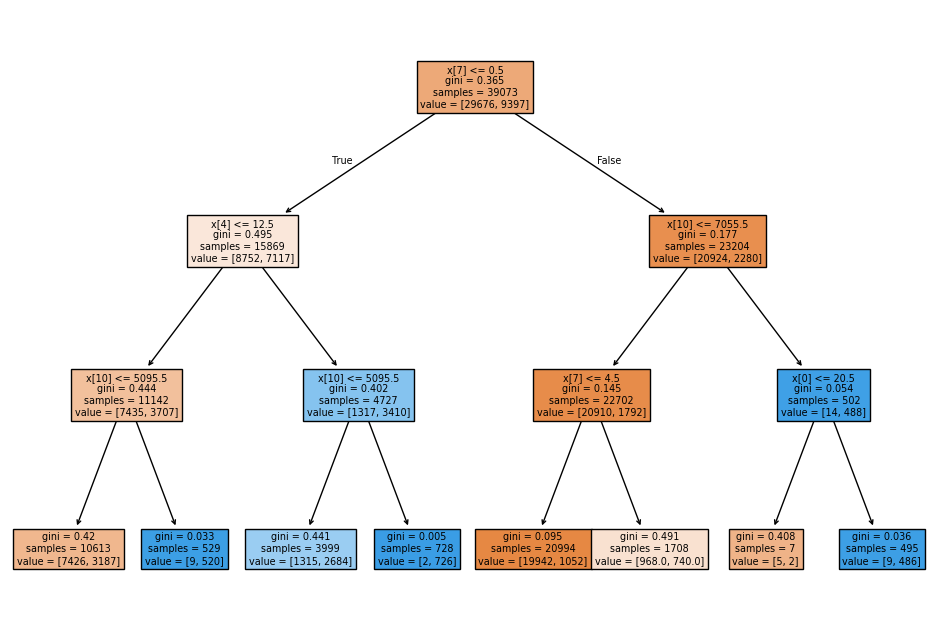

In [248]:
#e
plt.figure(figsize = (12,8))
tree.plot_tree(clf_gini.fit(X_train, y_train), filled = True)
#clf_gini.fit(X_train, y_train): Melatih ulang model Decision Tree menggunakan data pelatihan (X_train dan y_train).
#tree.plot_tree(...): Membuat visualisasi dari struktur pohon keputusan (decision tree) yang terbentuk.

In [249]:
#f
#confusion matrix
cm_gini = confusion_matrix(y_test, y_pred_en)
cm_en = confusion_matrix(y_test, y_pred_gini)

print('Confusion matrix entropy: \n', cm_gini)
print('Confusion matrix gini index: \n', cm_en)

#confusion_matrix(y_test, y_pred_en): Menghitung confusion matrix untuk model dengan kriteria Entropy, menggunakan label sebenarnya (y_test) dan prediksi yang dibuat oleh model (y_pred_en).
#confusion_matrix(y_test, y_pred_gini): Menghitung confusion matrix untuk model dengan kriteria Gini, menggunakan label sebenarnya (y_test) dan prediksi yang dibuat oleh model (y_pred_gini).


Confusion matrix entropy: 
 [[7136  343]
 [1172 1118]]
Confusion matrix gini index: 
 [[7136  343]
 [1172 1118]]


In [250]:
#g
print('Classification Report Entropy')
print(classification_report(y_test, y_pred_en))
print('Classification Report Gini Index')
print(classification_report(y_test, y_pred_gini))

#classification_report(y_test, y_pred_en): Menghitung dan mencetak laporan klasifikasi untuk model dengan kriteria Entropy, menggunakan label sebenarnya (y_test) dan prediksi yang dibuat oleh model (y_pred_en).
#classification_report(y_test, y_pred_gini): Menghitung dan mencetak laporan klasifikasi untuk model dengan kriteria Gini, menggunakan label sebenarnya (y_test) dan prediksi yang dibuat oleh model (y_pred_gini)

Classification Report Entropy
              precision    recall  f1-score   support

           0       0.86      0.95      0.90      7479
           1       0.77      0.49      0.60      2290

    accuracy                           0.84      9769
   macro avg       0.81      0.72      0.75      9769
weighted avg       0.84      0.84      0.83      9769

Classification Report Gini Index
              precision    recall  f1-score   support

           0       0.86      0.95      0.90      7479
           1       0.77      0.49      0.60      2290

    accuracy                           0.84      9769
   macro avg       0.81      0.72      0.75      9769
weighted avg       0.84      0.84      0.83      9769



### Kedua model, baik dengan kriteria Entropy maupun Gini Index, menghasilkan akurasi yang sama pada data uji, yaitu 0.8449 atau sekitar 84.49%. Akurasi pada data latih juga sama di antara kedua model, yaitu 0.8384 atau sekitar 83.84%. Ini menunjukkan bahwa kedua kriteria menghasilkan model dengan performa akurasi yang identik.

Karena hasil akurasi, confusion matrix, dan classification report identik, tidak ada perbedaan signifikan antara kriteria Entropy dan Gini Index dalam membedakan kelas dalam dataset ini.
Salah satu kriteria tidak lebih unggul daripada yang lain, sehingga pilihan antara Entropy atau Gini Index bisa dilakukan berdasarkan preferensi atau kompleksitas yang lebih rendah.

# Naive Bayes

In [251]:
#a
from sklearn.naive_bayes import GaussianNB

nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

#nb_classifier = GaussianNB(): Membuat instance dari kelas GaussianNB, yang akan digunakan sebagai model klasifikasi.
#nb_classifier.fit(X_train, y_train): Melatih model nb_classifier menggunakan data pelatihan X_train (fitur) dan y_train (label target).
#Model ini belajar dari data pelatihan untuk menentukan hubungan antara fitur dan kelas target.

GaussianNB()

In [252]:
#b
nb_y_pred = nb_classifier.predict(X_test)
#Naive Bayes yang telah dilatih (nb_classifier) untuk memprediksi label (kelas) dari data pengujian (X_test).
#nb_y_pred: Variabel ini menyimpan hasil prediksi, yang berupa array dari label yang diprediksi untuk setiap contoh dalam X_test.

In [253]:
#c & d
nb_cm = confusion_matrix(y_test, nb_y_pred)
#confusion matrix menggunakan fungsi confusion_matrix dari scikit-learn, yang membandingkan label sebenarnya (y_test) dengan label yang diprediksi oleh model (nb_y_pred). Confusion matrix ini memberikan gambaran tentang jumlah prediksi yang benar dan salah untuk setiap kelas.
print("Confusion Matrix:\n", nb_cm)
print("naive bayes Accuracy Score: ", accuracy_score(y_test, nb_y_pred))
#Akurasi dihitung sebagai proporsi jumlah prediksi yang benar terhadap total jumlah data

Confusion Matrix:
 [[7099  380]
 [1580  710]]
naive bayes Accuracy Score:  0.7993653393387246


In [254]:
#e
print('Classification Report GaussianNB')
print(classification_report(y_test, nb_y_pred))
#classification_report menghitung dan mencetak laporan klasifikasi. Laporan ini membandingkan label sebenarnya (y_test) dengan label yang diprediksi oleh model (nb_y_pred).

Classification Report GaussianNB
              precision    recall  f1-score   support

           0       0.82      0.95      0.88      7479
           1       0.65      0.31      0.42      2290

    accuracy                           0.80      9769
   macro avg       0.73      0.63      0.65      9769
weighted avg       0.78      0.80      0.77      9769



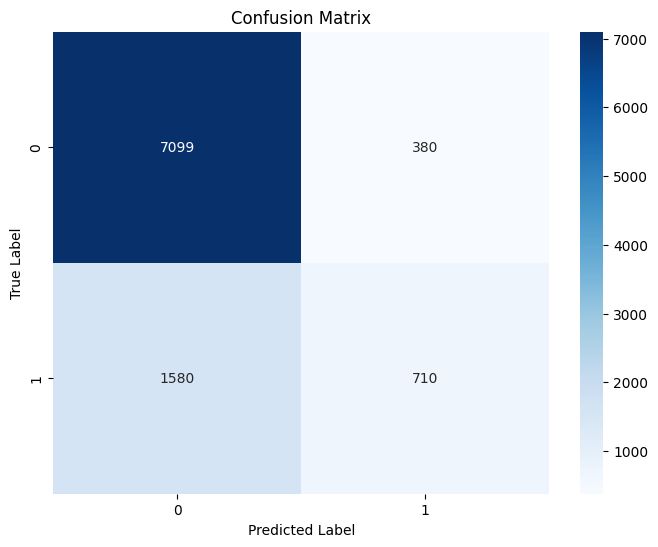

In [255]:
# heatmap
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, nb_y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

#cm: Data yang akan dipetakan.
#annot=True: Menampilkan nilai di dalam sel heatmap.
#fmt='d': Mengatur format tampilan angka menjadi desimal (bilangan bulat).
#cmap='Blues': Mengatur palet warna heatmap menjadi variasi biru.

## Akurasi model Naive Bayes pada data uji adalah 0.7994 atau sekitar 79.94%. Akurasi ini lebih rendah dibandingkan model Decision Tree dengan kriteria Entropy dan Gini Index, yang memiliki akurasi 84.49%.
## Naive Bayes menghasilkan akurasi keseluruhan yang lebih rendah dan performa yang kurang baik dalam mendeteksi individu dengan pendapatan >50K dibandingkan model Decision Tree.
##Precision untuk kelas 1 (pendapatan >50K) cukup tinggi, tetapi rendahnya recall menunjukkan bahwa model lebih sering mengklasifikasikan individu >50K sebagai ≤50K, yang menyebabkan banyak kesalahan pada kelas tersebut.
##Jika Naive Bayes tetap digunakan, pertimbangkan untuk mengoptimalkan parameter atau menggunakan varian lain dari Naive Bayes yang mungkin lebih sesuai dengan data.

# KNN

In [278]:
#KNN Model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [279]:
#Prediksi
y_pred = knn.predict(X_test)

In [280]:
# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.7629


In [281]:
# Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85      7479
           1       0.49      0.39      0.44      2290

    accuracy                           0.76      9769
   macro avg       0.66      0.63      0.64      9769
weighted avg       0.75      0.76      0.75      9769



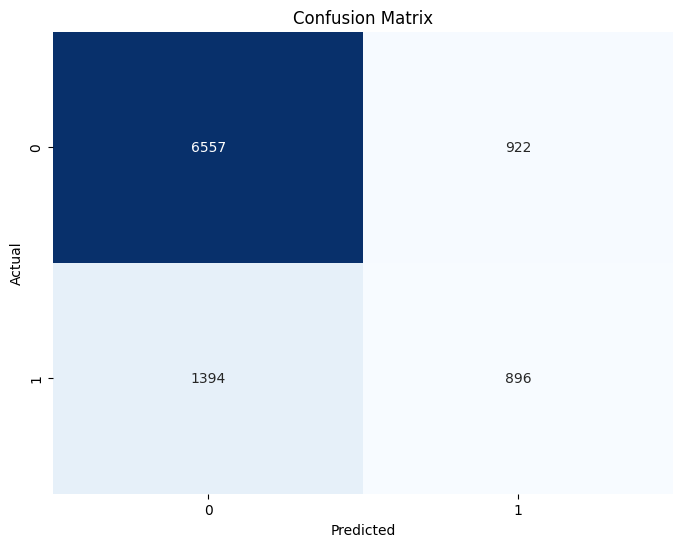

In [268]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Akurasi keseluruhan model pada data uji adalah 0.7629 atau sekitar 76.29%.
###Akurasi ini lebih rendah dibandingkan model Decision Tree dan Naive Bayes sebelumnya, yang menunjukkan performa yang sedikit kurang optimal dalam mengklasifikasikan data. Knn memiliki performa yang baik dalam mendeteksi individu dengan pendapatan ≤50K, tetapi kesulitan dalam mendeteksi individu dengan pendapatan >50K.
###Akurasi dan metrik pada kelas 1 masih rendah, yang menunjukkan bahwa model ini cenderung bias ke kelas mayoritas (≤50K). Performa keseluruhan model lebih rendah dibandingkan dengan model lain yang diuji, seperti Decision Tree dan Naive Bayes.



### Dari Model Accuration, dapat dilihat Model accuracy score with criterion entropy & gini sama: 84.49% (tertinggi di antara ketiga model) naive bayes Accuracy Score hanya 79.94% dan knn 76.29%
Maka urutan paling bagus untuk prediksi data diabetes yaitu:
1. Gini Entropy
2. Naive Bayes
4. KNN

### karena memiliki akurasi terendah (76.29%) Recall pada kelas 1: 0.39,lebih baik daripada Naive Bayes tetapi tetap rendah dibandingkan dengan Decision Tree.